In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from pandas.plotting._core import plot_frame

crime_data = pd.read_csv('Chicago_crime.csv')

## Exploratory Data Analysis

### Maps of crime in Chicago

In [22]:
def draw_map():
    chicago_map = geopandas.GeoDataFrame.from_file('map/chicago.shp')
    plt.rcParams["figure.figsize"]=(20,20)
    chicago_map.plot(cmap='autumn')
    plt.title("Crime Map of Chicago")
    plt.xlabel("Logitude")
    plt.ylabel("Latitude")

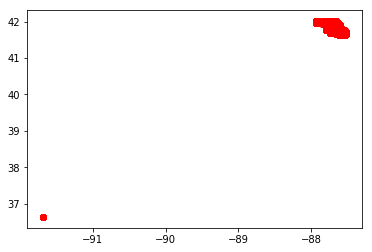

In [23]:
# There is an outlier in the dataset
plt.scatter(x=crime_data["Longitude"], y=crime_data["Latitude"], color="r")

In [24]:
# Get rid of the outlier
crime_data = crime_data[crime_data["Longitude"] != crime_data["Longitude"].min()]
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [50]:
# Getting districts for having the location markers
districts = crime_data[["Longitude", "Latitude", "District"]].groupby("District").mean()
districts.index = districts.index.astype(int)
districts

KeyError: "['District'] not in index"

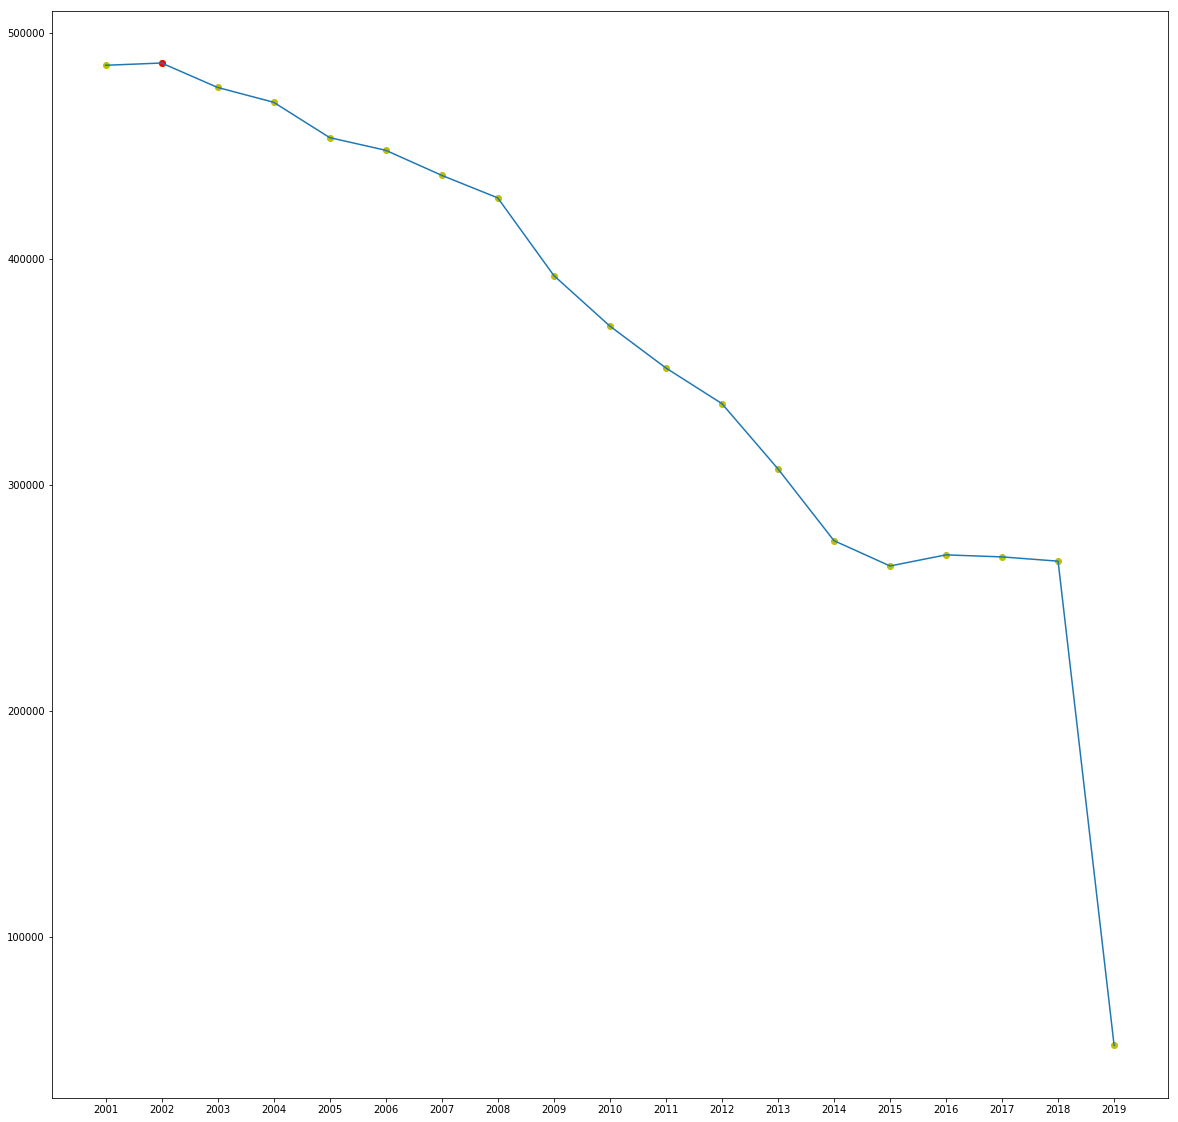

In [27]:
x = crime_data[["Year", "ID"]].groupby("Year").count().index
y = crime_data[["Year", "ID"]].groupby("Year").count()["ID"]

plt.plot(x, y)
plt.rcParams["figure.figsize"]=(20,20)
plt.scatter(x=x, y=y, color="y")
plt.scatter(x=2002, y=crime_data[["Year", "ID"]].groupby("Year").count().max(), color="r")
plt.xticks(x)
plt.show()

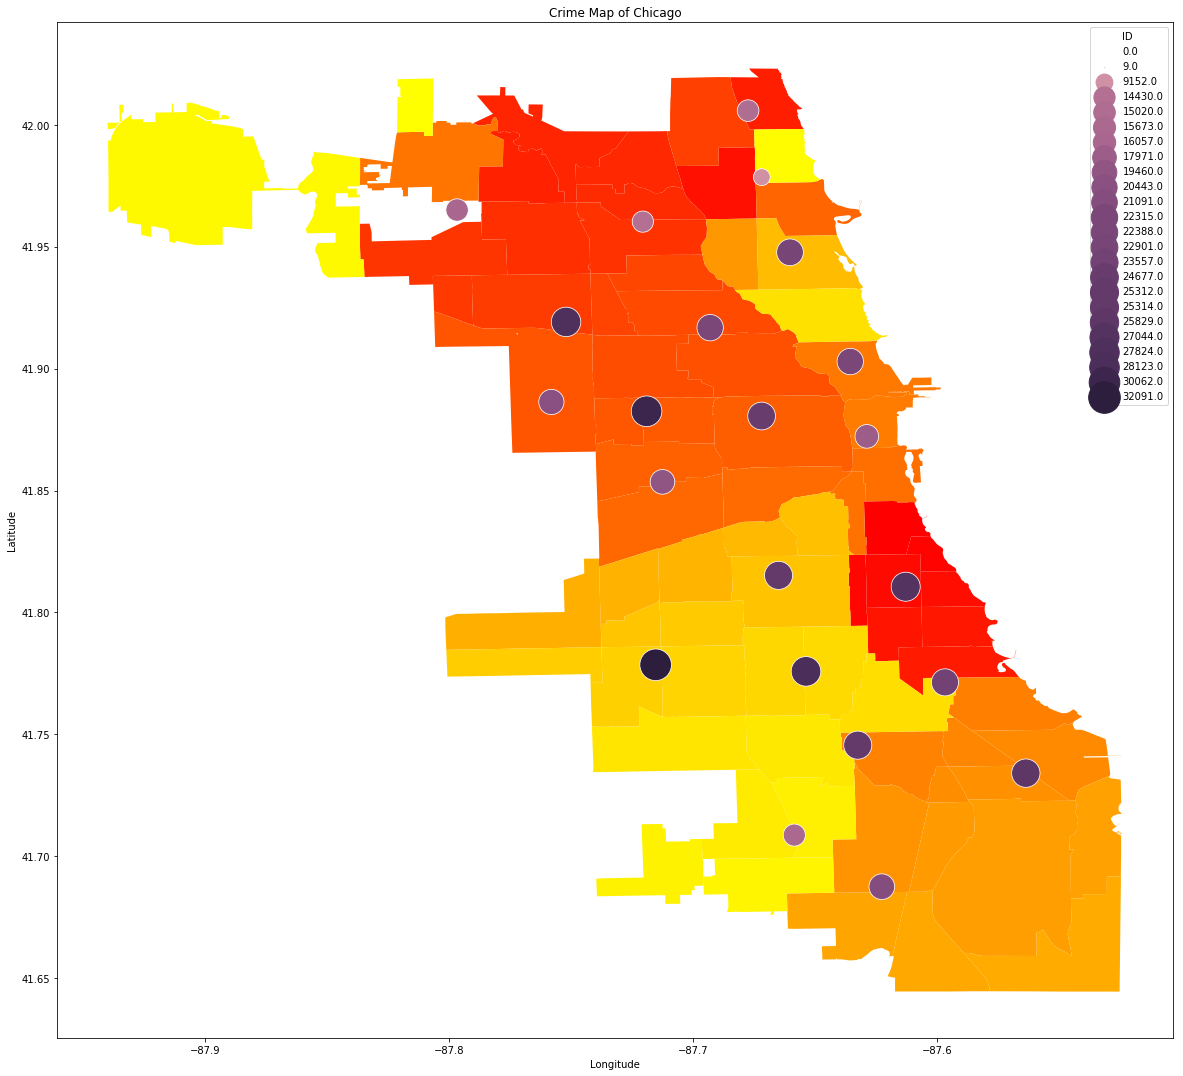

In [28]:
#Crimes by region
crimes_by_region = crime_data[["Year", "District", "ID"]][crime_data["Year"]==2002].groupby("District").count()
crimes_by_region.index = crimes_by_region.index.astype(int)
crimes_by_region = pd.concat([crimes_by_region[['ID']], districts], sort=True, axis=1).fillna(0)

draw_map()
sns.scatterplot(x="Longitude", y="Latitude", size="ID", hue="ID", sizes=(0, 1000), data=crimes_by_region, legend="full", color='black')


### Graphs of crime in Chicago

Text(0, 0.5, 'Percentage of Crimes')

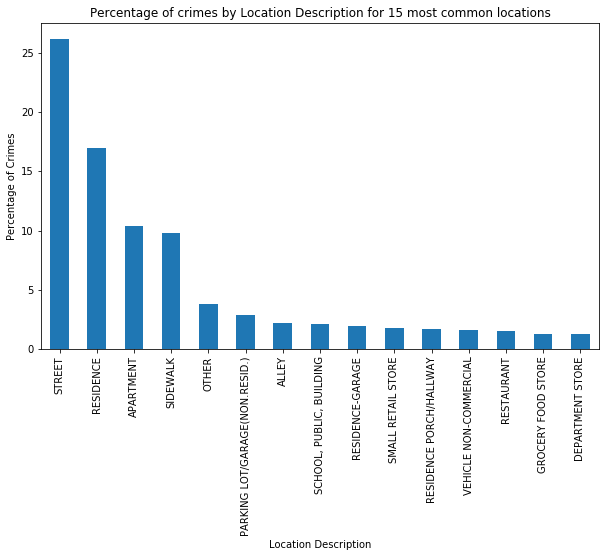

In [29]:
# %crimes by location description (10 most common locations) 

percent = crime_data['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')

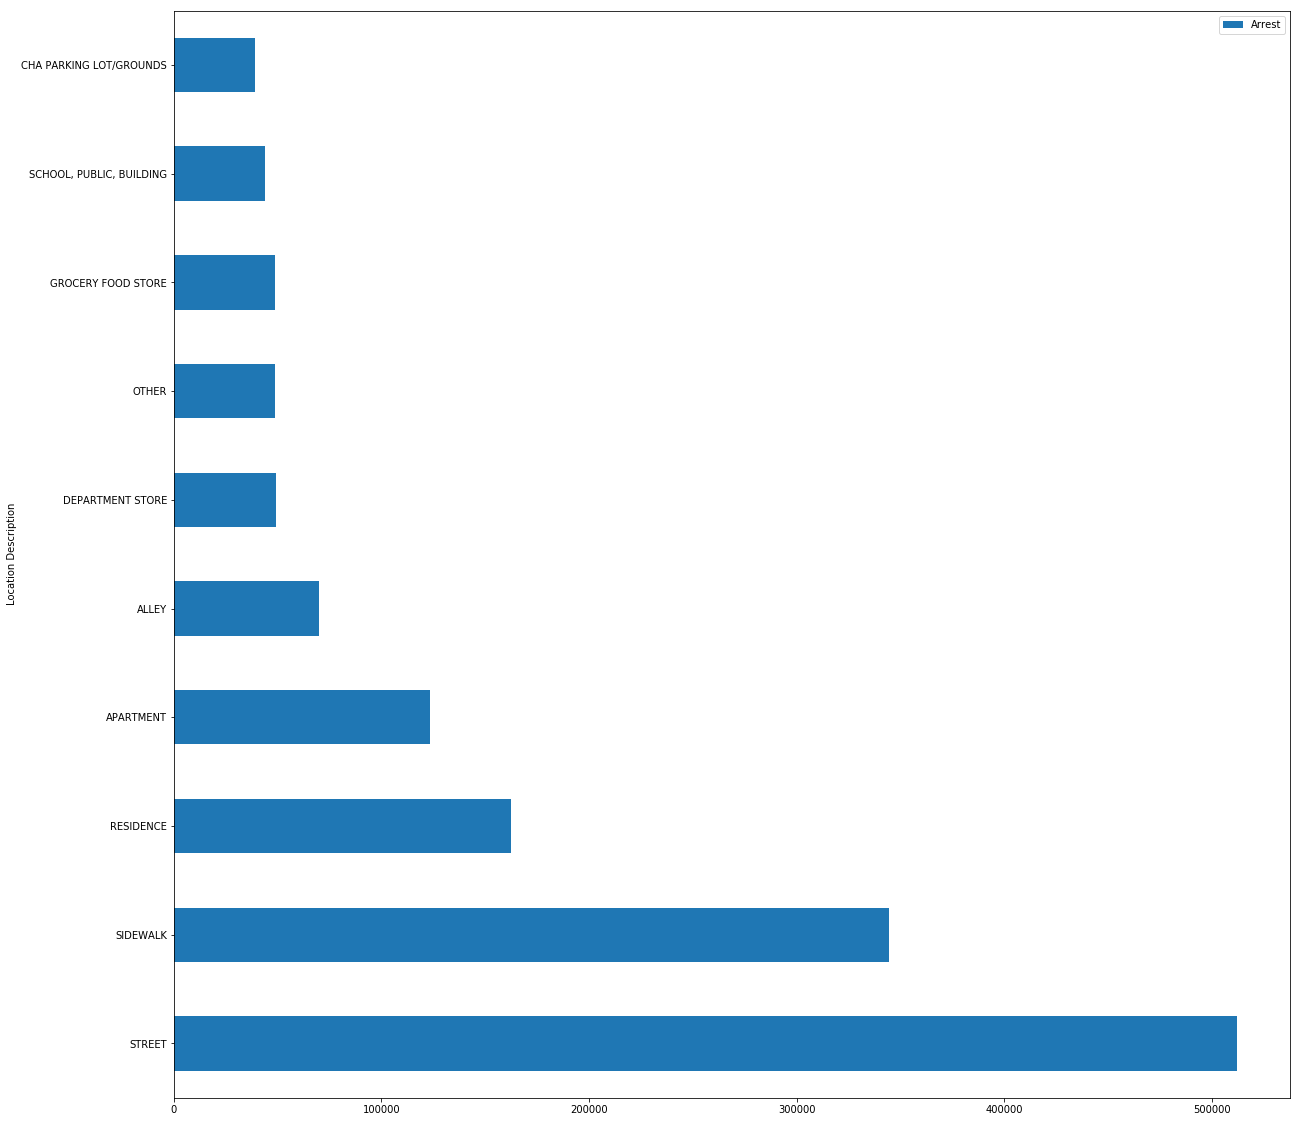

In [30]:
#Top ten places that an arrest is likely to occur in Chicago
foo = crime_data[['Location Description','Arrest']].groupby('Location Description').sum(axis=1).sort_values(by = 'Arrest',ascending = False)[:10]
foo.plot(kind='barh')

#### Analysis of crime by Primary Type

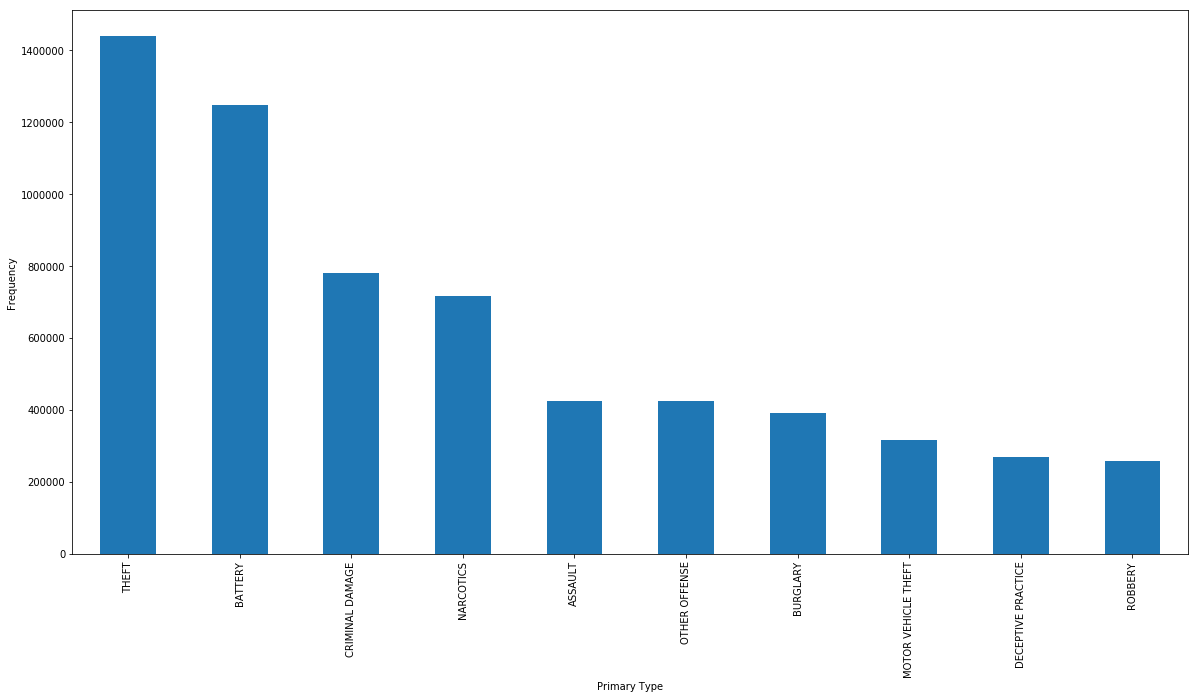

In [31]:
#Frequency of theft based on location
plt.figure(figsize=(20,10))
plt.ylabel('Frequency')
plt.xlabel('Type of Offence')
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False).head(10)
crime_type.plot(kind='bar', style='seaborn-paper')

Text(0, 0.5, 'Percentage of Crimes')

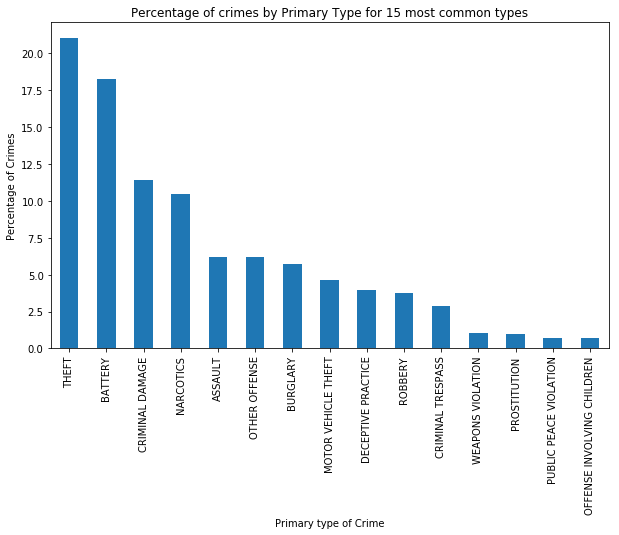

In [32]:
# %crimes by crime type (10 most common crime types) 

percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

In [33]:
# Likelihood of getting Arrested for the top 20 crime types in Chicago

true = crime_data[crime_data['Arrest']==True]
false = crime_data[crime_data['Arrest']==False]
arrestt = crime_data['Primary Type'].value_counts().head(20).to_frame()
tru = true['Primary Type'].value_counts().to_frame()
fals = false['Primary Type'].value_counts().to_frame()

In [34]:
# Percentage of People getting arrested for these crimes

arrested_development = pd.merge(arrestt, tru, how= 'left', left_index= True, right_index=True)
arrested_development = pd.merge(arrested_development, fals, how= 'left', left_index= True, right_index=True)
arrested_development.rename(columns={'Primary Type_x':'Total','Primary Type_y':'Arrested','Primary Type': 'Not Arrested'}, inplace=True)
arrested_development['Percentage Arrested'] = (arrested_development['Arrested']/arrested_development['Total'])*100
arrested_development.reset_index(inplace=True)
arrested_development.rename(columns={'index': 'Primary Type'}, inplace=True)
arrested_development.sort_values(by=['Percentage Arrested'],inplace=True, ascending = False)
arrested_development

,Primary Type,Total,Arrested,Not Arrested,Percentage Arrested
12,PROSTITUTION,68549,68282,267,99.610498
3,NARCOTICS,716026,711816,4210,99.412033
18,GAMBLING,14437,14332,105,99.272702
19,LIQUOR LAW VIOLATION,14125,13998,127,99.100885
17,INTERFERENCE WITH PUBLIC OFFICER,15584,14310,1274,91.824949
11,WEAPONS VIOLATION,72566,57529,15037,79.278174
10,CRIMINAL TRESPASS,195675,142950,52725,73.054810
13,PUBLIC PEACE VIOLATION,48270,31005,17265,64.232443
16,SEX OFFENSE,25563,7777,17786,30.422877
4,ASSAULT,425164,97985,327179,23.046401


Text(0, 0.5, 'Percentage of Crimes')

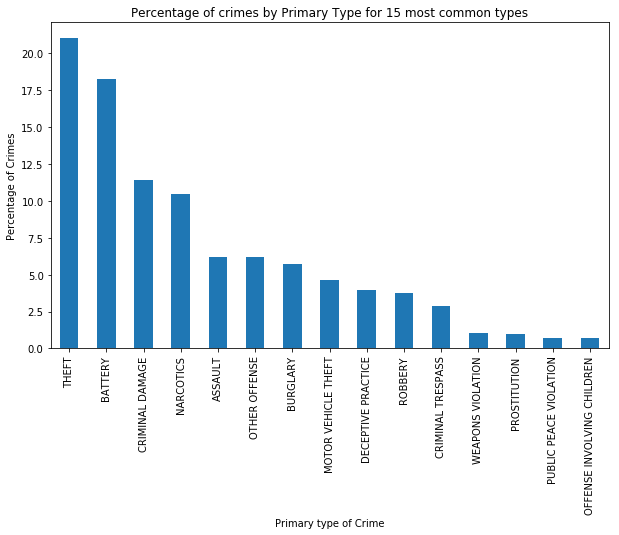

In [35]:
#  %crimes by crime type (10 most common crime types) 
percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

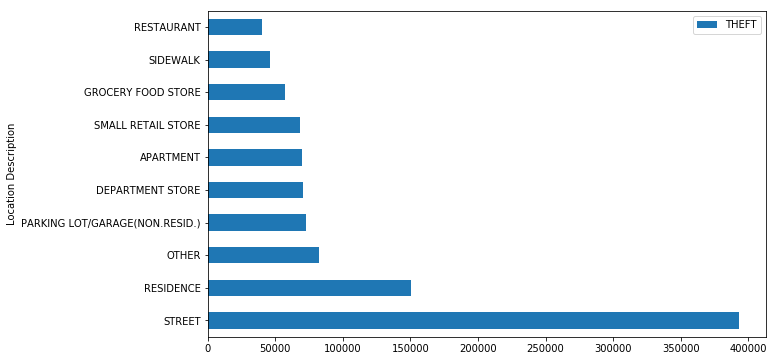

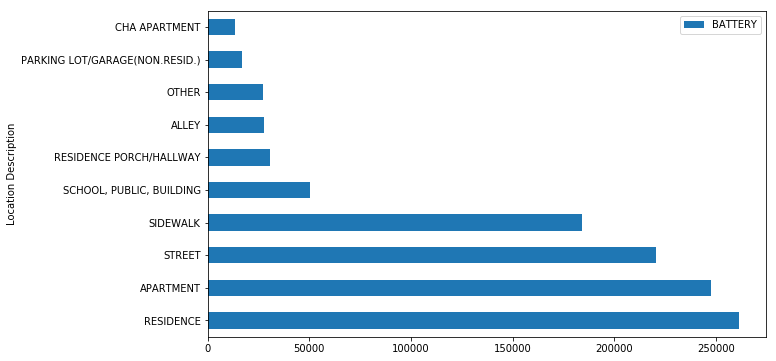

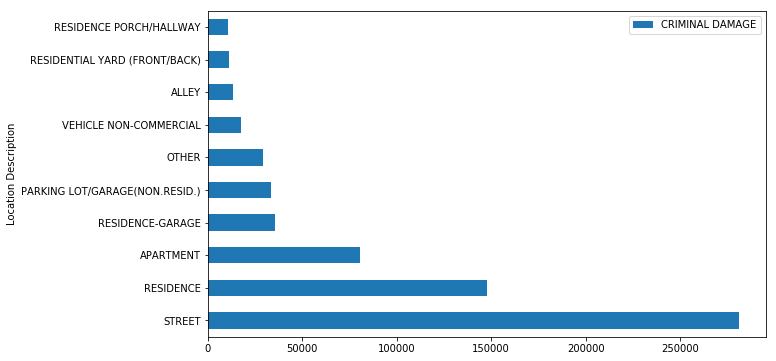

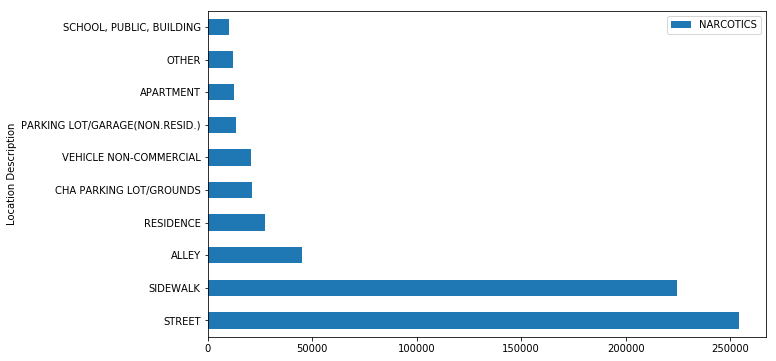

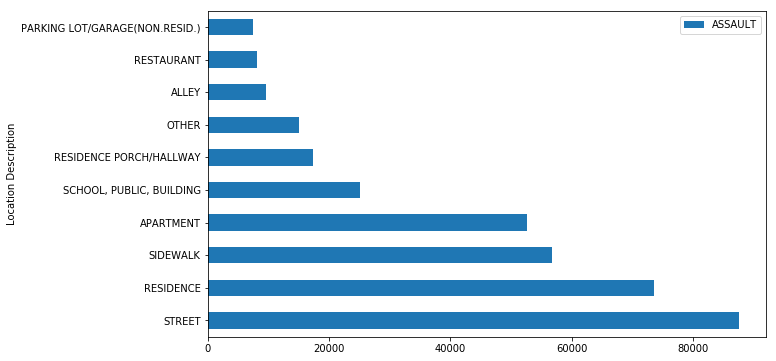

In [36]:
#  Most common Locations based on type of crime for top ten highest occuring crimes
import numpy as np
import seaborn as sns
location_by_type  = crime_data.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
columns =  location_by_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[row].sort_values(ascending= False)[:10].plot(kind='barh').legend()

for col in columns:
    plot_pivot_location_by_type(location_by_type,col)

## Data Processing

In [37]:
# Converting 'Date' to datetime format
date_format = '%m/%d/%Y %I:%M:%S %p'
crime_data['Date'] = pd.to_datetime(crime_data['Date'].astype(str), format =date_format)

#Converting to int so that it may be used in the classification models
crime_data['Date'] = crime_data['Date'].astype(int)

In [38]:
#picking Primary Types with > 5000 samples
primary_type = crime_data['Primary Type'].value_counts()[:23].keys()
crime_data = crime_data.loc[crime_data['Primary Type'].isin(primary_type)] 

In [39]:
# picking  Descriptions with > 5000 samples
description = crime_data['Description'].value_counts()[:98].keys()
crime_data = crime_data.loc[crime_data['Description'].isin(description)] 

In [40]:
# picking Location Descriptions with > 5000 samples
location_description = crime_data['Location Description'].value_counts()[:58].keys()
crime_data = crime_data.loc[crime_data['Location Description'].isin(location_description)] 



In [41]:
#We now have fewer categories for each categorical column, so we can reliably encode them 
#Using one-hot encoding

#checking number of features by category
categorical = ['District','Description','Location Description']

print('number of disinct categories by feature')
for cat in categorical:    
    print(cat + " : "+ str(len(crime_data[cat].value_counts())) )

number of disinct categories by feature
District : 24
Description : 98
Location Description : 58


In [42]:
#Encoding categorical features
categorical = ['District','Description','Location Description']
prefixes =  ['District_','Description_','Location Description_']
crime_data = pd.get_dummies(crime_data, columns= categorical, prefix = prefixes)



In [43]:
# Feature Selection

unused = ['Beat','Block','Community Area','Case Number','District','FBI Code','ID','IUCR','Location','Updated On','Ward']
crime_data = crime_data[[col for col in crime_data if (col not in unused)]]



In [44]:
# At this point there are 4 features with Nan values [Latitude, Longitude, X-coordinate, Y- coordinate ]
# All of the Nans appear in the same 55055 rows, so we can simply drop them

crime_data.dropna(inplace=True)

In [45]:
#Picking a subset of the crime data, by taking every 5th row
#the dataset still has >6mil rows
sampled_crime_data = crime_data[1:6486635:5]
sampled_crime_data.shape

(1297303, 189)

## Models

In [46]:
#Function to test models

from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
# Model Functions 
def evaluate_model(model,X_test,y_test):
    y_predicted = model.predict(X_test)
    model_score = model.score(X_test,y_test) 
    recall_score = metrics.recall_score(y_test,y_predicted, average = None)
    accuracy_score = metrics.accuracy_score(y_test,y_predicted)
    precision_score = metrics.precision_score(y_test,y_predicted,average = None)   
    
    print('model score : ' + str(model_score) )
    print('accuracy score : ' + str(accuracy_score))
    print('precision score : ' + str(precision_score)  )
    print('recall score : ' + str(recall_score))
    

def test_model(df,model,features,**kwargs):
    X = df[features]
    y = df['Primary Type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    model.fit(X_train,y_train)
    evaluate_model(model,X_test,y_test,**kwargs)   

In [47]:
#Decision Tree
#The best model by our metrics
# ~0.93 accuracy
#High recall snd precision scores
from sklearn import tree

features = [col for col in crime_data if (col != 'Primary Type')]

decision_tree = tree.DecisionTreeClassifier()
test_model(sampled_crime_data,decision_tree,features)

model score : 0.9332646781324964
accuracy score : 0.9332646781324964
precision score : [0.92424242 0.49821566 0.83297979 0.99994829 0.8830874  0.98860302
 0.95442304 1.         1.         1.         1.         0.2173913
 1.         1.         0.99934641 0.99994942 1.         1.
 0.99650489 1.         0.99994287 1.        ]
recall score : [0.93435449 0.50400039 0.82952871 1.         0.9025522  0.98839585
 0.95491761 1.         1.         1.         0.99823633 0.15625
 1.         0.99997007 1.         1.         1.         1.
 0.99658405 1.         0.99995715 1.        ]


In [26]:
#Random Forest
#~0.92 accuracy 
#High recall snd precision scores
from sklearn import ensemble

features = [col for col in crime_data if (col != 'Primary Type')]

random_forest = ensemble.RandomForestClassifier()
test_model(sampled_crime_data,random_forest,features)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


model score : 0.9386246192173452
accuracy score : 0.9386246192173452
precision score : [0.91011236 0.54260721 0.83988507 0.99984702 0.98507463 0.98563181
 0.99186992 0.99853094 1.         0.99672131 0.99635036 0.16666667
 0.99993493 0.99916072 0.99731724 0.99949107 1.         1.
 0.99342052 1.         0.99998564 1.        ]
recall score : [0.88043478 0.52057107 0.85246008 0.99989801 0.89851485 0.99811242
 0.94153716 0.99939457 0.99832215 1.         0.98201439 0.03030303
 0.99973979 0.99967012 0.99398396 0.99954194 0.99966353 0.99944072
 0.99653896 0.99348837 0.99984209 1.        ]


In [48]:
#Logistic Regression
from sklearn import linear_model
features = [col for col in crime_data if (col != 'Primary Type')]

logistic_regression = linear_model.LogisticRegression()
test_model(sampled_crime_data,logistic_regression,features)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


model score : 0.2158908012308603
accuracy score : 0.2158908012308603
precision score : [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.2158908
 0.       ]
recall score : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
#KNN
from sklearn import neighbors
features = [col for col in crime_data if (col != 'Primary Type')]

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
test_model(sampled_crime_data,knn,features)

model score : 0.15267662783742283
accuracy score : 0.15267662783742283
precision score : [0.01072386 0.06722407 0.20729896 0.07772248 0.00650054 0.12949759
 0.03322646 0.07730102 0.00923077 0.         0.         0.
 0.05661846 0.16640677 0.0030303  0.07092961 0.06679035 0.02205882
 0.04388371 0.03125    0.25370609 0.02083333]
recall score : [0.02625821 0.15650307 0.36565356 0.10982988 0.00696056 0.14367666
 0.02362939 0.06126157 0.00501672 0.         0.         0.
 0.03338143 0.08942895 0.00065402 0.02002934 0.01198003 0.00175953
 0.00635526 0.00090416 0.16278439 0.00070151]
